In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from PIL import Image
import os
import pandas as pd
import pylab as pl

In [4]:
def load_images(img_dir, grayscale=False):
    """Loads images from within a specified directory.

    Args:
      img_dir (str): The directory from which to load (.jpg) images.
      grayscale (bool): Whether to convert the image into grayscale. Defaults to False.

    Returns:
      images: An array of image objects loaded from the specified directory

    """
    images = []

    for file in os.listdir(img_dir):
        if file.endswith(".jpg"):
            im = Image.open(os.path.join(img_dir, file))

            im = im.resize((100, 100))

            if grayscale:
                im = np.array(im, dtype=np.float64) / 255

                # Convert image to grayscale
                r, g, b = im[:,:,0], im[:,:,1], im[:,:,2]
                gray = 0.2989*r + 0.5870*g + 0.1140*b
                im = gray.reshape((1, -1))[0]

            images.append(im)

    return images

def plot_image_space(images, X, title="Projection of the Images into 2 Dimensions"):
    """Generates and shows a plot of images in a feature space.

    A figure with one plot is generated. The plot displays the location of each image in 
    relation to the image's feature values in the input feature space (X).

    Args:
      images (Image): An image.
      images (SciPy array): An array of SSQs, one computed for each k.

    """
    # min-max normalization    
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)

    # Create a figure
    pl.figure(figsize=(16, 5))
    ax = pl.subplot(111)
    #ax.axis('off')

    # Generate picture thumbnails in the plot
    if hasattr(matplotlib.offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        for i in range(len(images)):
            imagebox = matplotlib.offsetbox.OffsetImage(images[i], zoom=.65)
            ab = matplotlib.offsetbox.AnnotationBbox(imagebox, X[i][0:2])                                  
            ax.add_artist(ab)

    # Add figure labels and ticks
    pl.title(title, fontsize=16)
    pl.xticks([]), pl.yticks([])

    # Add figure bounds
    pl.ylim((np.min(X, axis=0)[1])-0.25,(np.max(X, axis=0)[1])+0.25)
    pl.xlim((np.min(X, axis=0)[0])-0.1,(np.max(X, axis=0)[0])+0.1)

In [5]:
img_dir = os.path.join(os.getcwd(), "images") # directory path
images = load_images(img_dir) # load images in the specified directory

In [23]:
X = pd.DataFrame([im.histogram() for im in images])

# Part 1

In [8]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,251,31,31,38,49,54,60,61,71,80,...,13,3,10,2,11,6,0,7,2,72
1,3,1,1,1,3,1,2,0,3,4,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1,3,8,3,9,7,17,13,23,...,8,13,8,12,10,13,10,21,10,50
4,0,0,0,0,0,0,0,2,1,0,...,3,7,9,11,14,13,18,21,26,47


[ 0.24632315  0.10808704]


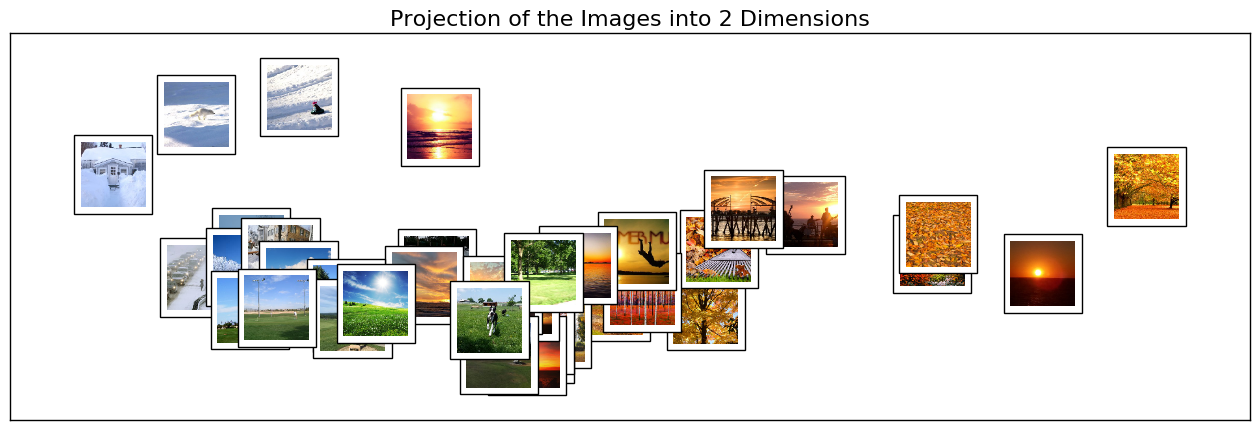

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
plot_image_space(images, X_new, title="Projection of the Images into 2 Dimensions")

# Part 2
### 1. Two images that are close together in the plot have similar histograms of color values, while two images that are far apart in the plot have distinct histograms of color values.
### 2. Images corresponding to one season tend to group together more closely than others because images of a specific season have the same color theme (such as green for spring, red for summer, yellow for fall, and white for winter), thus have similar histogram of color values.

# Part 3

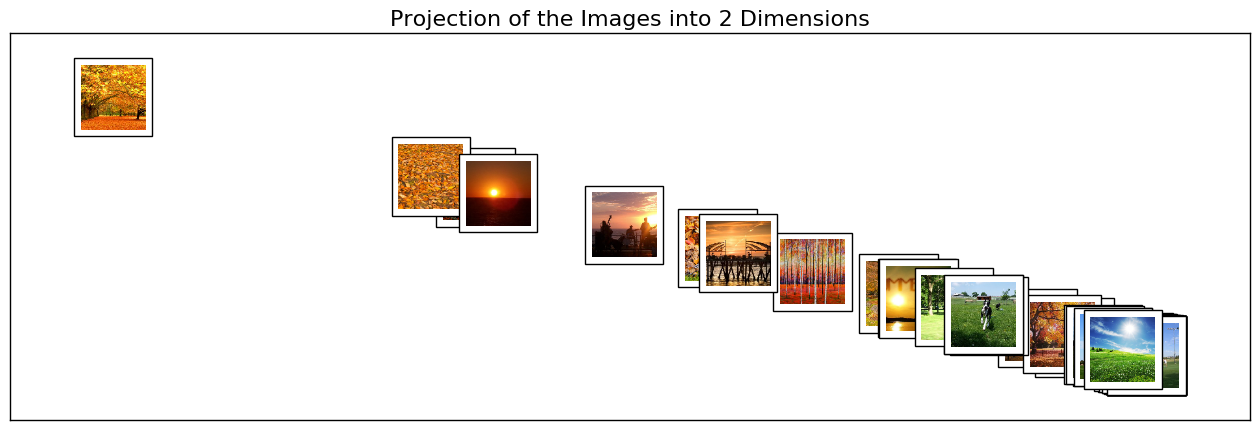

In [37]:
from sklearn.cluster import FeatureAgglomeration
fa = FeatureAgglomeration(n_clusters=2)
X_new = fa.fit_transform(X)
plot_image_space(images, X_new, title="Projection of the Images into 2 Dimensions")

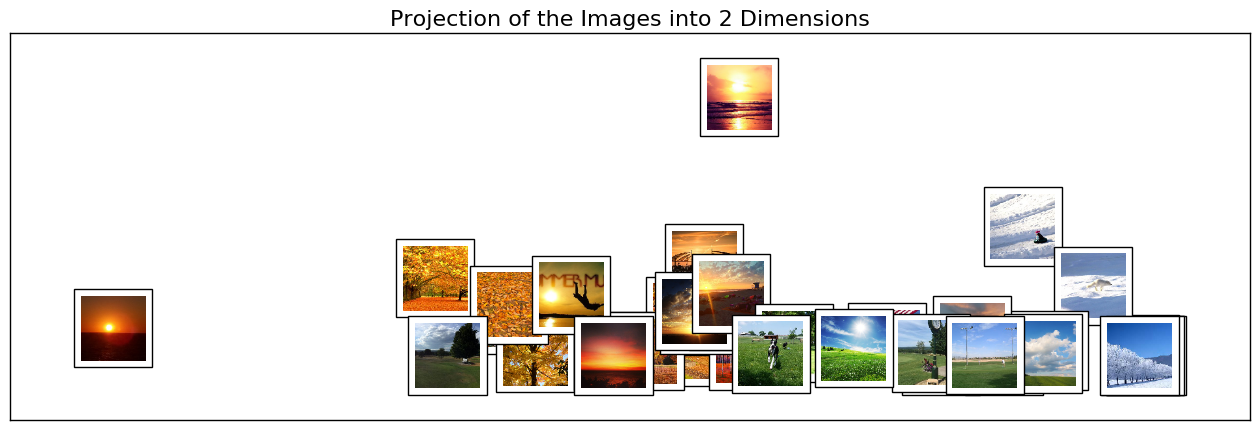

In [38]:
from sklearn.cluster import FeatureAgglomeration
fa = FeatureAgglomeration(n_clusters=4)
X_new = fa.fit_transform(X)
plot_image_space(images, X_new, title="Projection of the Images into 2 Dimensions")

### Here I used feature agglomeration to perform unsupervised data reduction. As you can see by comparing the above two plot, the performance of data reduction significantly improved when I increased the number of clusters from 2 to 4.